# House Price Prediction


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA

In [51]:
# Read the Data
data=pd.read_csv('/content/drive/MyDrive/ITC_DS/Assignments/Week1_EDA/raw_house_data.csv')
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [52]:
# Converting Data types from object to numeric
Data=data.copy()
Data=Data.replace('None',np.nan)
Data['HOA']=Data['HOA'].str.replace(',','')
Data['fireplaces']=Data['fireplaces'].str.replace(" ",'')
Data[['garage','bathrooms','sqrt_ft','HOA','fireplaces','taxes']]=Data[['garage','bathrooms','sqrt_ft','HOA','fireplaces','taxes']].apply(pd.to_numeric)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory

In [53]:
# imputate and amputating the data
Data['HOA'] = Data['HOA'].fillna(0)
Data=Data.dropna()
Data.info()
print(Data.shape[0]/5000*100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               4908 non-null   int64  
 1   sold_price        4908 non-null   float64
 2   zipcode           4908 non-null   int64  
 3   longitude         4908 non-null   float64
 4   latitude          4908 non-null   float64
 5   lot_acres         4908 non-null   float64
 6   taxes             4908 non-null   float64
 7   year_built        4908 non-null   int64  
 8   bedrooms          4908 non-null   int64  
 9   bathrooms         4908 non-null   float64
 10  sqrt_ft           4908 non-null   float64
 11  garage            4908 non-null   float64
 12  kitchen_features  4908 non-null   object 
 13  fireplaces        4908 non-null   float64
 14  floor_covering    4908 non-null   object 
 15  HOA               4908 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory

## Classification

In [54]:
# Feature Engineering
Data.loc[:,'Price_Per_ftsq']=Data.loc[:,'sold_price']/Data.loc[:,'sqrt_ft']
Data.loc[:,'Room_ratio_BathtoBed']=Data.loc[:,'bathrooms']/Data.loc[:,'bedrooms']
#plt.hist(Data.loc[:,'Price_Per_ftsq'],bins=20)
#plt.xlabel('Price per square feet')
#plt.ylabel('Frequency')

In [55]:
# removing the Outliers
Data=Data.loc[Data['Price_Per_ftsq']<800,:]
Data=Data.loc[Data['Price_Per_ftsq']>99,:]
Data.loc[:,'Price_Per_ftsq_disc']=pd.to_numeric(pd.cut(Data['Price_Per_ftsq'], bins=[0,100,150,200,250,300,350,400,500,600,700,800,900,1000], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12]))
Data.loc[Data['HOA']>0,'HOA']=1
Data = Data.sample(frac = 1)
Data=Data.reset_index()
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4880 non-null   int64  
 1   MLS                   4880 non-null   int64  
 2   sold_price            4880 non-null   float64
 3   zipcode               4880 non-null   int64  
 4   longitude             4880 non-null   float64
 5   latitude              4880 non-null   float64
 6   lot_acres             4880 non-null   float64
 7   taxes                 4880 non-null   float64
 8   year_built            4880 non-null   int64  
 9   bedrooms              4880 non-null   int64  
 10  bathrooms             4880 non-null   float64
 11  sqrt_ft               4880 non-null   float64
 12  garage                4880 non-null   float64
 13  kitchen_features      4880 non-null   object 
 14  fireplaces            4880 non-null   float64
 15  floor_covering       

<ipython-input-56-0fbec2535f71>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data_V2.corr()*100,annot=True,fmt=".0f",)


<Axes: >

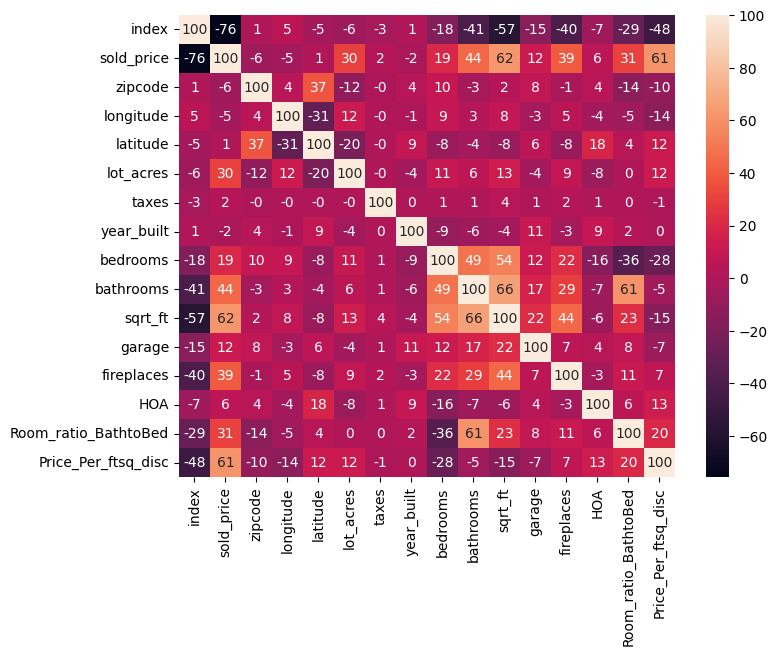

In [56]:
Data_V2=Data.copy()
Data_V2=Data_V2.drop(['MLS','Price_Per_ftsq'],axis=1)
fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(Data_V2.corr()*100,annot=True,fmt=".0f",)

In [57]:
# Knn classification Model
class KNNClassifier():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,K, epsilon=2e-2): # K is total number of nearest neighbour
    N=len(X)                           # No of samples
    y_hat=np.zeros(N)

    for i in range(N):
      dist2=np.sum((self.X-X[i])**2,axis=1)
      idxt = np.argsort(dist2)[:K]          # we will get the sorted list indexs instead of values
      gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
      y_hat[i]=np.bincount(self.y[idxt],weights=gamma_k).argmax()

    return y_hat

  def accuracy(self,y,y_hat):
    return round(np.mean(y==y_hat)*100,1)

  def confusion_matrix(self,y,y_hat):
    y_actual=pd.Series(y,name='Actual')
    y_predict=pd.Series(y_hat,name='Predicted')
    df_confusion = pd.crosstab(y_actual, y_predict)
    return df_confusion

In [58]:
X1_train=Data.loc[:4400,['longitude','latitude']]
y1_train=Data.loc[:4400,'Price_Per_ftsq']
y2_train=Data.loc[:4400,'Price_Per_ftsq_disc']

X1_test=Data.loc[4401:,['longitude','latitude']]
y1_test=Data.loc[4401:,'Price_Per_ftsq']
y2_test=Data.loc[4401:,'Price_Per_ftsq_disc']
print(X1_train.shape)
print(X1_test.shape)

X1_train=X1_train.to_numpy()
y2_train=y2_train.to_numpy()
X1_test=X1_test.to_numpy()
y2_test=y2_test.to_numpy()

(4401, 2)
(479, 2)


(32.25, 32.35)

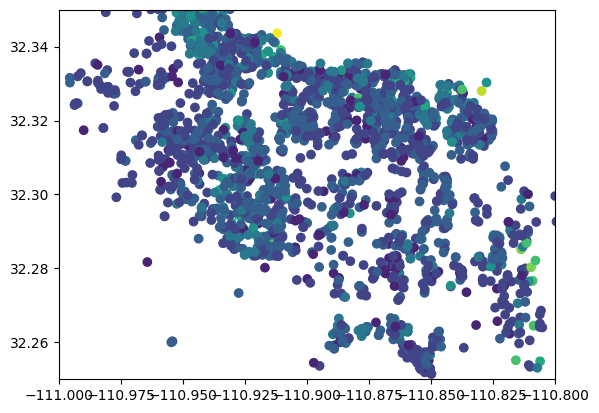

In [59]:
plt.scatter(Data['longitude'],Data['latitude'],c=Data['Price_Per_ftsq_disc'])
plt.xlim([-111.0,-110.8])
plt.ylim([32.25,32.35])

In [60]:
knn=KNNClassifier()
knn.fit(X1_train,y2_train)
K=20
y_hat_1_train=knn.predict(X1_train,K)
y_hat_1_test=knn.predict(X1_test,K)
print('Train',knn.accuracy(y2_train,y_hat_1_train))
print('Test',knn.accuracy(y2_test,y_hat_1_test))

Train 54.6
Test 48.4


## Linear Regression

In [61]:
def OLS(Y,Y_hat,N):
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

def R2(Y,Y_hat):
  return (1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [62]:
class MVLinearRegression():

  def fit(self,X,y,eta=1e-3,epochs=1e3,show_curve=False):
    epochs=int(epochs)
    N, D=X.shape
    Y=y

    # Begin Optimization
    self.W=np.random.randn(D) # random initialize
    J=np.zeros(epochs)

    # Stochastic Gradient Descent
    for epoch in range(epochs):
      Y_hat=self.predict(X)
      J[epoch]=OLS(Y,Y_hat,N)
      # weight update rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel('epochs')
      plt.ylabel('$\mathcal{J}$')

  def predict(self,X):
    return X@self.W

In [63]:
# Data
X=Data.loc[:,['Price_Per_ftsq_disc','sqrt_ft','Room_ratio_BathtoBed','garage','fireplaces','HOA']]
y=Data.loc[:,'sold_price']
X_train=X.loc[:4400,:].to_numpy()
X_test=X.loc[4401:,:].to_numpy()
y_train=y.loc[:4400].to_numpy()
y_test=y.loc[4401:].to_numpy()
X=X.to_numpy()
y=y.to_numpy()

Text(0.5, 0, ' Bathroom to Bedroom Ratio')

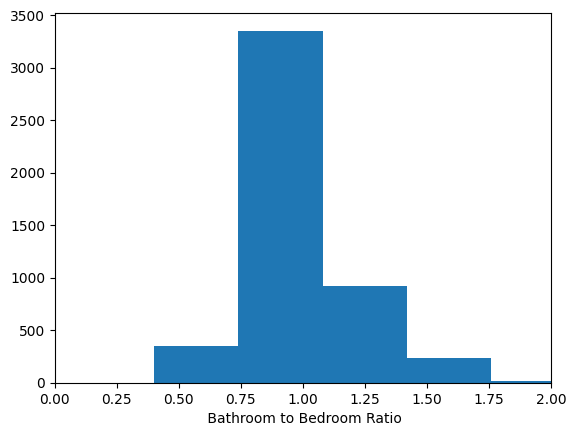

In [64]:
plt.hist(Data['Room_ratio_BathtoBed'],bins=20)
plt.xlim([0,2])
plt.xlabel(' Bathroom to Bedroom Ratio')

(1328, 20)
(3552, 20)


Text(0, 0.5, 'Frequency')

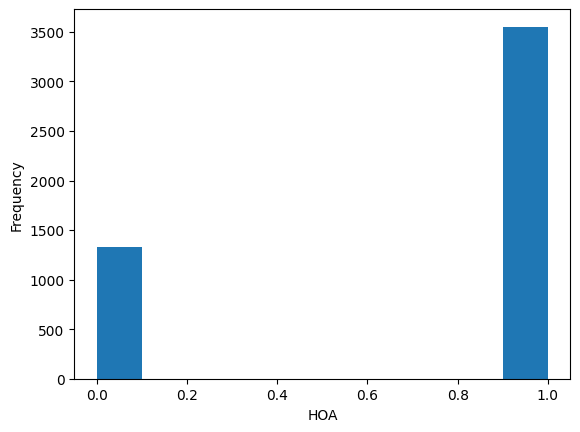

In [65]:
print(Data.loc[Data['HOA']==0,:].shape)
print(Data.loc[Data['HOA']==1,:].shape)
plt.hist(Data['HOA'])
plt.xlabel('HOA')
plt.ylabel('Frequency')

0.37840017898629796


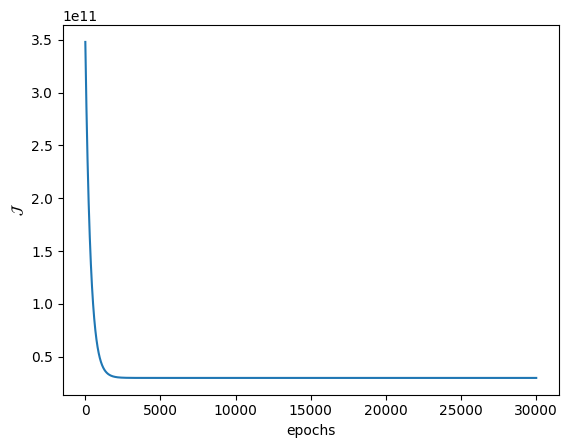

In [66]:
my_reg=MVLinearRegression()
my_reg.fit(X,y,eta=1e-10,epochs=3e4,show_curve=True)
print(R2(y,my_reg.predict(X)))

Text(0, 0.5, 'Predicted Price ($)')

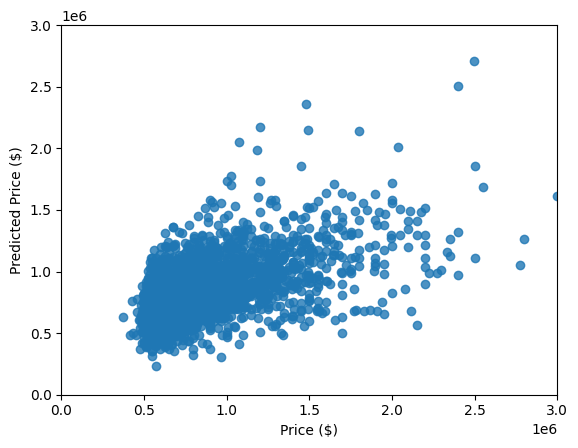

In [67]:
plt.scatter(y,my_reg.predict(X),alpha=0.8,c='tab:blue')
plt.xlim([0,3e6])
plt.ylim([0,3e6])
plt.xlabel('Price ($)')
plt.ylabel('Predicted Price ($)')

In [68]:
class KNNRegressor():

  def fit(self,X,y):
    self.X=X
    self.y=y

  def predict(self,X,K,epsilon=1e-3):
    N=len(X)
    y_hat=np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt=np.argsort(dist2)[:K]
      gamma_k=np.exp(-dist2[idxt])/np.exp(-dist2[idxt]+1e-3).sum()
      y_hat[i]=gamma_k.dot(self.y[idxt])

    return y_hat

In [69]:
knnr=KNNRegressor()
knnr.fit(X_train,y_train)

In [70]:
y_hat_train=knnr.predict(X_train,40)
y_hat_test=knnr.predict(X_test,40)

<ipython-input-68-89d61007ec8f>:14: RuntimeWarning: invalid value encountered in divide
  gamma_k=np.exp(-dist2[idxt])/np.exp(-dist2[idxt]+1e-3).sum()


nan


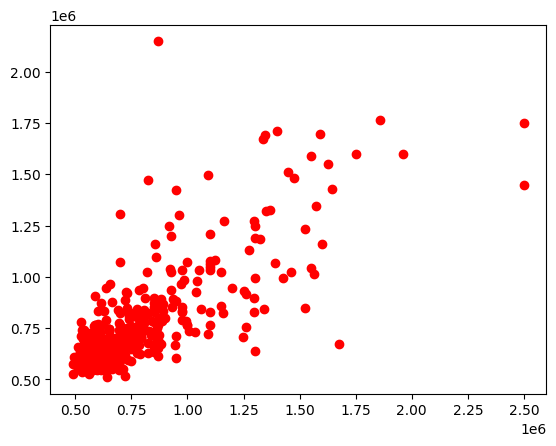

In [71]:
plt.plot(y_test,y_hat_test,'or')
print(R2(y_test,y_hat_test))


## Final Prediction

### Address to Co-ordinates

In [ ]:
# importing geopy library and Nominatim class
from geopy.geocoders import Nominatim

# calling the Nominatim tool and create Nominatim class
loc = Nominatim(user_agent="Geopy Library")

# entering the location name
getLoc = loc.geocode("3005 W, via DE Suenos, Tucson, 85713")

# printing address
print(getLoc.address)

# printing latitude and longitude
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)

In [81]:
X_TEST=np.array([-111.029300,32.187930])
Price_Per_ftsq=knn.predict(X_TEST,K)
#X=np.array(['Price_Per_ftsq_disc','Room_ratio_BathtoBed','garage','fireplaces','HOA'])
X=np.array([Price_Per_ftsq[0],2481,2/4,2,1,0])
House_Price_pred=my_reg.predict(X)
print(House_Price_pred)

517006.0829609215
